# **Sprint 1**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics

#**Sprint 2**

Dropping the unwanted features from the dataset like feature and outlet identifier and the output class item outlet sales

In [ ]:
X_train=train_data.drop(['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'],axis=1)
Y_train=train_data['Item_Outlet_Sales']

Found 5 categorical valued features so we need to convert those into numerical values

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                14204 non-null  float64
 1   Item_Fat_Content           14204 non-null  object 
 2   Item_Visibility            14204 non-null  float64
 3   Item_Type                  14204 non-null  object 
 4   Item_MRP                   14204 non-null  float64
 5   Outlet_Establishment_Year  14204 non-null  int64  
 6   Outlet_Size                14204 non-null  object 
 7   Outlet_Location_Type       14204 non-null  object 
 8   Outlet_Type                14204 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 998.8+ KB


**Label Encoding**

In [ ]:

encoder = LabelEncoder()

In [ ]:
#converting categorical values into numerical values
X_train['Item_Fat_Content'] = encoder.fit_transform(X_train['Item_Fat_Content'])

X_train['Item_Type'] = encoder.fit_transform(X_train['Item_Type'])

X_train['Outlet_Size'] = encoder.fit_transform(X_train['Outlet_Size'])

X_train['Outlet_Location_Type'] = encoder.fit_transform(X_train['Outlet_Location_Type'])

X_train['Outlet_Type'] = encoder.fit_transform(X_train['Outlet_Type'])

In [ ]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,4,249.8092,1999,1,0,1
1,5.92,1,0.019278,14,48.2692,2009,1,2,2
2,17.50,0,0.016760,10,141.6180,1999,1,0,1
3,19.20,1,0.000000,6,182.0950,1998,2,2,0
4,8.93,0,0.000000,9,53.8614,1987,0,2,1


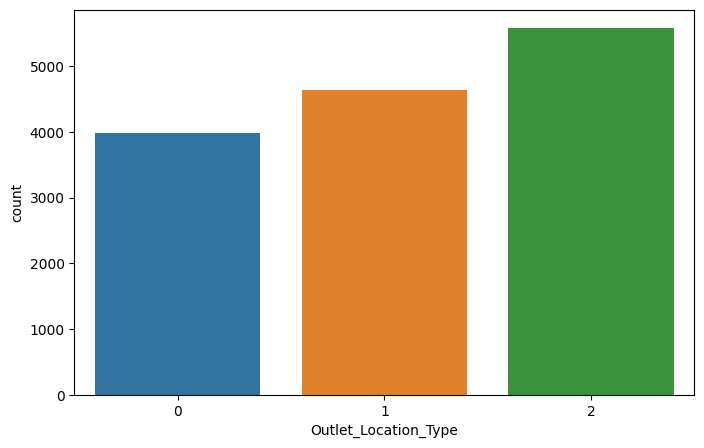

In [ ]:
#countplot for Outlet_Location_Type converted into categorical values
plt.figure(figsize=(8,5))
sns.countplot(x='Outlet_Location_Type', data=X_train)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train_new, X_test_new, Y_train_new, Y_test_new = train_test_split(X_train, Y_train, test_size=0.3, random_state=2)

**Doing the same preprocessing to the test data file**

In [ ]:
print(X_train_new.shape, X_test_new.shape,Y_train_new.shape,Y_test_new.shape)

(9942, 9) (4262, 9) (9942,) (4262,)


**Training the model using XGBoost Regressor**

In [ ]:
regressor = XGBRegressor()
regressor.fit(X_train_new, Y_train_new)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
training_data_prediction = regressor.predict(X_train)
score_train = str(regressor.score(X_train_new, Y_train_new))
r2_train = metrics.r2_score(Y_train, training_data_prediction)
r2_train_mse= metrics.mean_squared_error(Y_train, training_data_prediction)
r2_train_mae= metrics.mean_absolute_error(Y_train, training_data_prediction)
print('score value',score_train)
print('R_2 Score value= ', r2_train)
print('MAE value= ', r2_train_mae)
print('RMSE value= ',np.sqrt(r2_train_mse))

score value 0.8746197454628322
R_2 Score value=  0.8089271154611468
MAE value=  422.6535733078428
RMSE value=  679.2108073240377


In [ ]:
test_data_prediction1 = regressor.predict(X_test_new)
score_test = str(regressor.score(X_test_new, Y_test_new))
r2_test = metrics.r2_score(Y_test_new, test_data_prediction1)
r2_train_mse1= metrics.mean_squared_error(Y_test_new, test_data_prediction1)
r2_train_mae1= metrics.mean_absolute_error(Y_test_new, test_data_prediction1)
print('score value',score_test)
print('R_2 Score value = ', r2_test)
print('MAE value= ', r2_train_mae1)
print('RMSE value= ',np.sqrt(r2_train_mse1))

score value 0.657626561611998
R_2 Score value =  0.657626561611998
MAE value=  581.3786459260241
RMSE value=  913.2704040675336


In [ ]:
pred = regressor.predict(np.array([[13.650000, 1, 0.012741, 13, 57.6588,1987, 0, 2,1]]))
print(pred)


[840.7078]


In [ ]:
X_train.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300000,0,0.016047,4,249.8092,1999,1,0,1
1,5.920000,1,0.019278,14,48.2692,2009,1,2,2
2,17.500000,0,0.016760,10,141.6180,1999,1,0,1
3,19.200000,1,0.000000,6,182.0950,1998,2,2,0
4,8.930000,0,0.000000,9,53.8614,1987,0,2,1
5,10.395000,1,0.000000,0,51.4008,2009,1,2,2
6,13.650000,1,0.012741,13,57.6588,1987,0,2,1
7,12.792854,0,0.127470,13,107.7622,1985,1,2,3
8,16.200000,1,0.016687,5,96.9726,2002,2,1,1
9,19.200000,1,0.094450,5,187.8214,2007,2,1,1
